In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## -- Importando CSVs e Entendendo os Datasets --


In [54]:
df_questions = pd.read_csv("../archive/Stress_Dataset.csv")
df_questions.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


OBS: Na descrição do Dataset acima é citado que as perguntas foram feitas variando de 1 a 5 pontos, usando uma escala de "Not at all" até "Extremely".

In [55]:
df_stress_levels = pd.read_csv("../archive/StressLevelDataset.csv")
df_stress_levels.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


OBS2: Já para este dataset, não foi informada a escala exata de como cada informação foi medida, mas ele informa que elas foram agrupadas em 5 fatores científicos:

🧠 Psychological Factors

    anxiety_level
    self_esteem
    mental_health_history
    depression

🏥 Physiological Factors

    headache
    blood_pressure
    sleep_quality
    breathing_problem

🌆 Environmental Factors

    noise_level
    living_conditions
    safety
    basic_needs

🎓 Academic Factors

    academic_performance
    study_load
    teacher_student_relationship
    future_career_concerns

🤝 Social Factors

    social_support
    peer_pressure
    extracurricular_activities
    bullying


## -- Analisando colunas de potenciais variáveis chave --

Primeiro estou buscando uma variável que possa ser usada como medida para todo o restante do dataset, ou sua maioria, uma comparação principal para quebrar o dataset em grupos e fazer análises específicas em cima desses grupos

In [56]:
questions_column = df_questions.columns
questions_column

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

In [57]:
df_questions["Have you recently experienced stress in your life?"].value_counts()

Have you recently experienced stress in your life?
3    263
2    219
4    193
5     90
1     78
Name: count, dtype: int64

Percebe-se que quando questionados sobre o estresse que têm experienciado na vida atualmente, os estudantes responderam mais aproximadamente a níveis moderados de estresse. Seria interessante fazer uma análise dentro de cada grupo de nível de estresse.

In [79]:
stress_type = df_questions["Which type of stress do you primarily experience?"].value_counts().reset_index(name="count")
stress_type

,Which type of stress do you primarily experience?,count
0,Eustress (Positive Stress) - Stress that motiv...,768
1,No Stress - Currently experiencing minimal to ...,43
2,Distress (Negative Stress) - Stress that cause...,32


In [96]:
stress_type['percent'] = ((stress_type['count'] / stress_type['count'].sum()) * 100).round(2)
stress_type

,Which type of stress do you primarily experience?,count,percent
0,Eustress (Positive Stress) - Stress that motiv...,768,91.1
1,No Stress - Currently experiencing minimal to ...,43,5.1
2,Distress (Negative Stress) - Stress that cause...,32,3.8


### Estranhamente, a maioria dos estudantes diz sentir um estresse ***"positivo"***, relatando que ganham motivação e performance.

In [59]:
stress_level_columns = df_stress_levels.columns
stress_level_columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [77]:
df_stress_levels[['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'stress_level']].describe()

,anxiety_level,self_esteem,mental_health_history,depression,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,0.996364
std,6.117558,8.944599,0.500175,7.727008,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,2.000000


### > **Valores Estranhos**

Percebi que as colunas possuem valores estranhos, com escalas e variações diferentes. Felizmente, após entrar na aba de [discussões](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/discussion/598633) do dataset ficou mais claro como os valores foram medidos.

- ``stress_level``: Varia de 0 a 2, representando *'no stress', 'normal/moderate stress' e 'high stress'*
- ``mental_health_history``: Binário que indica se o estudante já teve (`1`), ou não (`0`) algum problema com doenças mentais no passado.
- ``depression``: Valores de uma pontuação baseada em um PHQ-9 (Patient Health Questionnaire-9), um questionário rápido e validado para rastrear a depressão e avaliar a sua gravidade. Quanto maiores, mais graves.
- `anxiety_level` e `self_esteem`: aparentam seguir a mesma lógica que o anterior, quanto maior, mais grave o caso.

In [61]:
df_stress_levels["stress_level"].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

Após analisar as colunas, percebi que a coluna de ``'stress_level'`` mede os níveis de estresse dos estudantes entre 0 e 2. Anlisando o desvio padrão em relação à média, percebe-se que pela proximidade dos valores, a dispersão nos níveis de estresse é muito grande, confirmado pelo ``value_counts()``, o que é bom para analisar diferentes grupos.



### > **Portanto, decidi utilizar as respostas da pergunta ``'Have you recently experienced stress in your life?'`` como minha variável chave para análises no `df_questions`**

### Tendo

Assim, podemos quebrar o dataset em 5 grupos de diferentes intensidades de estresse e avaliar como campos diferentes se relacionam com cada um deles.

Então, abaixo começo a fazer algumas análises.

## -- 1. Análise de Performance Acadêmica e Hábitos de Estudo em relação aos níveis de Estresse --

A principal pergunta a ser respondida aqui é: como o nível de estresse impacta na dedicação e resultados acadêmicos do estudante? Percebemos mais cedo que a maioria dos estudantes diz que sente um estresse positivo, o qual os motiva e melhora sua performance, mas será que é isso mesmo que está acontecendo?

In [65]:
## Selecionando colunas relacionadas à performance acadêmica de ambos os dataframes para realizar análises

df_performance_questions = df_questions[
    [
        "Do you lack confidence in your choice of academic subjects?",
        "Do you attend classes regularly?",
        "Do you lack confidence in your academic performance?",
        "Have you recently experienced stress in your life?",
    ]
]

Decidi começar comparando as variáveis categóricas do ``df_performance_questions``

In [101]:
## Usando um dicionário para criar um resultado com melhor legibilidade
frequencia_dict = {
    1: "Not_at_All",
    2: "Rarely",
    3: "Sometimes",
    4: "Frequently",
    5: "Extremely",
}

result = df_performance_questions[
    [
        "Do you lack confidence in your choice of academic subjects?",
        "Do you attend classes regularly?",
        "Do you lack confidence in your academic performance?",
        "Have you recently experienced stress in your life?",
    ]
].copy()

## Aplicando o dicionário
result = result.apply(lambda col: col.map(frequencia_dict))

## Ordenando para a ordem correta
categorical_order = list(frequencia_dict.values())
result = result.apply(lambda col: pd.Categorical(col, categories=categorical_order, ordered=True))

## Separando em grupos
grouped_class_frequency = (
    result.groupby(
        [
            "Do you attend classes regularly?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Ammount")
)

grouped_subject_confidance = (
    result.groupby(
        [
            "Do you lack confidence in your choice of academic subjects?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Ammount")
)


grouped_academic_confidance = (
    result.groupby(
        [
            "Do you lack confidence in your academic performance?",
            "Have you recently experienced stress in your life?",
        ],
        observed=False,
    )
    .size()
    .reset_index(name="Ammount")
)

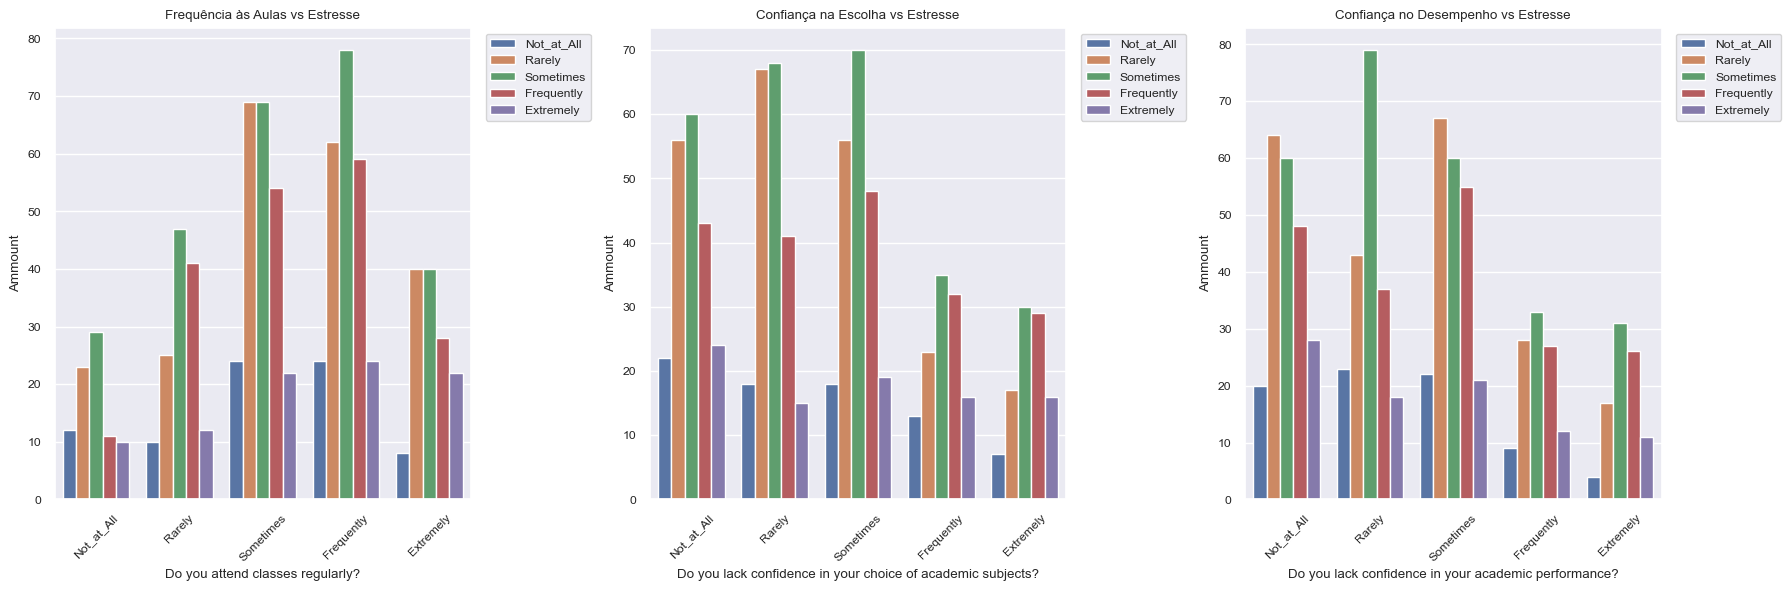

In [102]:
## Com tudo finalmente agrupado, vamos plotar isso
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set_theme(font_scale=0.8)

# Subplot 1: Frequência às aulas
sns.barplot(
    data=grouped_class_frequency,
    x="Do you attend classes regularly?",
    y="Ammount",
    hue="Have you recently experienced stress in your life?",
    ax=axes[0],
)
axes[0].set_title("Frequência às Aulas vs Estresse")

# Subplot 2: Confiança na escolha de matérias
sns.barplot(
    data=grouped_subject_confidance,
    x="Do you lack confidence in your choice of academic subjects?",
    y="Ammount",
    hue="Have you recently experienced stress in your life?",
    ax=axes[1],
)
axes[1].set_title("Confiança na Escolha vs Estresse")

# Subplot 3: Confiança no desempenho acadêmico
sns.barplot(
    data=grouped_academic_confidance,
    x="Do you lack confidence in your academic performance?",
    y="Ammount",
    hue="Have you recently experienced stress in your life?",
    ax=axes[2],
)
axes[2].set_title("Confiança no Desempenho vs Estresse")

for ax in axes:
    ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

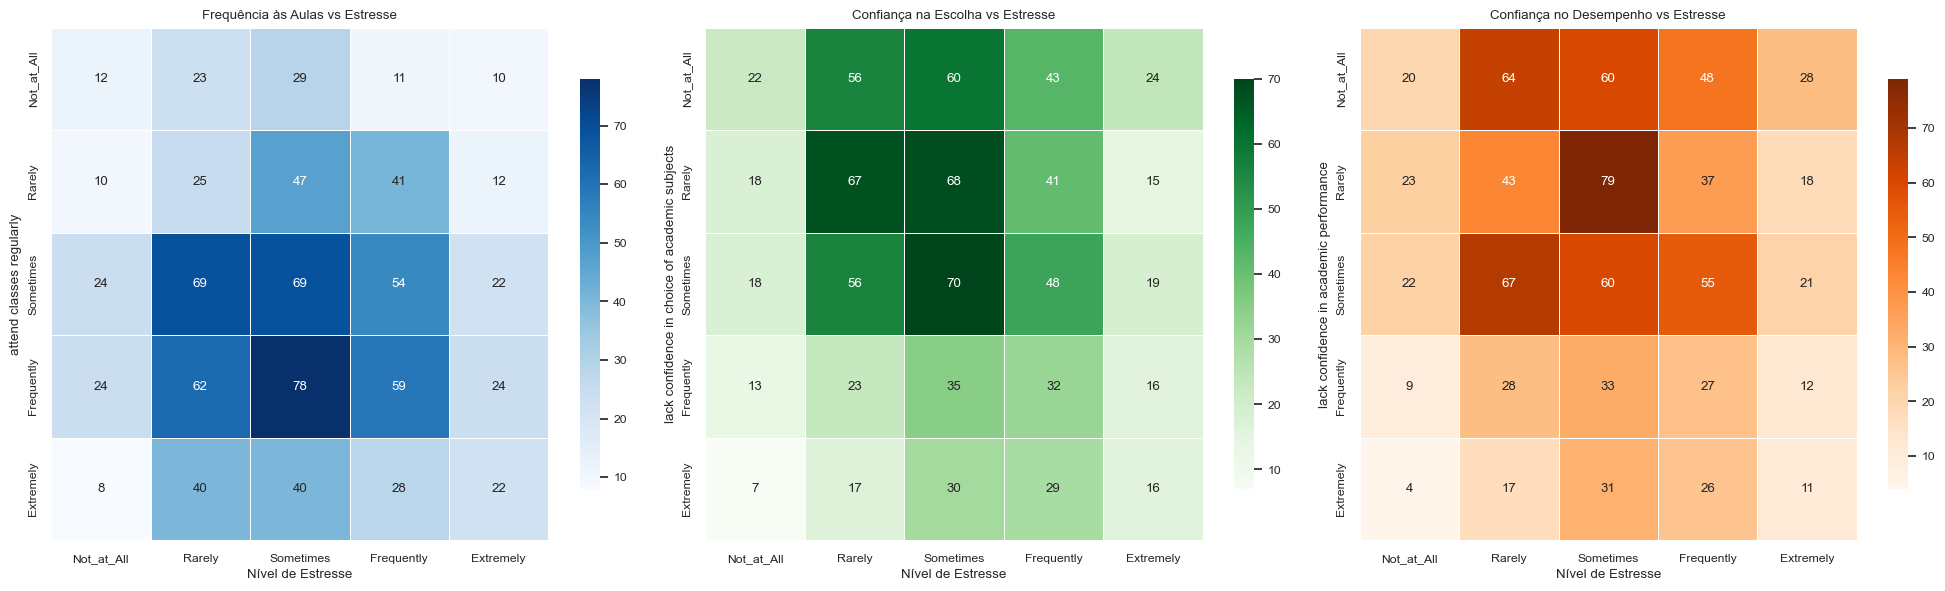

In [103]:
# Plotagens alternativas

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(font_scale=0.8)

# Heatmap 1: Frequência às Aulas
pivot_table1 = grouped_class_frequency.pivot(
    index="Do you attend classes regularly?",
    columns="Have you recently experienced stress in your life?",
    values="Ammount"
).fillna(0)

sns.heatmap(
    pivot_table1,
    annot=True,
    fmt='.0f',
    cmap='Blues',
    ax=axes[0],
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    linecolor='white'
)
axes[0].set_title("Frequência às Aulas vs Estresse")
axes[0].set_xlabel("Nível de Estresse")
axes[0].set_ylabel("attend classes regularly")

# Heatmap 2: Confiança na Escolha de Matérias
pivot_table2 = grouped_subject_confidance.pivot(
    index="Do you lack confidence in your choice of academic subjects?",
    columns="Have you recently experienced stress in your life?",
    values="Ammount"
).fillna(0)

sns.heatmap(
    pivot_table2,
    annot=True,
    fmt='.0f',
    cmap='Greens',
    ax=axes[1],
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    linecolor='white'
)
axes[1].set_title("Confiança na Escolha vs Estresse")
axes[1].set_xlabel("Nível de Estresse")
axes[1].set_ylabel("lack confidence in choice of academic subjects")

# Heatmap 3: Confiança no Desempenho Acadêmico
pivot_table3 = grouped_academic_confidance.pivot(
    index="Do you lack confidence in your academic performance?",
    columns="Have you recently experienced stress in your life?",
    values="Ammount"
).fillna(0)

sns.heatmap(
    pivot_table3,
    annot=True,
    fmt='.0f',
    cmap='Oranges',
    ax=axes[2],
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    linecolor='white'
)
axes[2].set_title("Confiança no Desempenho vs Estresse")
axes[2].set_xlabel("Nível de Estresse")
axes[2].set_ylabel("lack confidence in academic performance")

plt.tight_layout()
plt.show()

### Observações após as plotagens:

Como esperado de pesquisas assim, a maioria das pessoas se mantém concentrada no valor central *Sometimes*.

- **Frequência às Aulas vs Estresse**: A maior parte do estresse se concentra naqueles que comparecem às aulas com uma frequência mediana. A sua intensidade aparenta ser moderada. Também, há uma quantidade significativa de pessoas que possuem frequências média-baixa (*Sometimes e Rarely*) que sentem um estresse de grau 4 (*Frequently*), assim como o inverso também é verdade, há grandes quantidades de pessoas que apresentam baixo estresse (*Rarely*) e a mesma frequência média-baixa. **Conclusão:** aparentemente a frequência não parece ser um fator muito influenciado pelo estresse, na verdade, observando o gráfico de barras, o caso aparenta ser o inverso disso, percebendo-se que conforme a presença do indivíduo aumenta, seu nível de estresse também parece aumentar, até chegar na frequência mais alta possível, onde há uma queda significativa nos níveis de estresse como um todo. Curiosamente, os alunos com frequências ruins sentem menos estresse do que aqueles sempre presentes.

- **Confiança na Escolha vs Estresse**: Impressionantemente, os alunos parecem mais estressados quanto **menos** dúvidas nas suas escolhas de curso! Uma relação completamente inversa ao esperado. **Conclusão e Hipóteses:** o fato de que a maioria dos estudantes marcou opções como *Rarely* e *Sometimes* quando questionados quanto às suas certezas pode demonstrar que haja uma dúvida interna maior do que adimitem, mas não é possível afirmar. O que se percebe é que aqueles com mais dúvida, parecem sentir menos estresse. Por fim, percebemos pouca variação na quantidade de estudantes que sentem estresses frequentemente, independente de sua confiança em suas escolhas acadêmicas, mostrando que para um nível de estresse um pouco mais elevado do que a média, talvez já não haja influência das dúvidas no seu estresse, pois há apenas uma pequena queda. Se há uma influência no estresse nas dúvidas, seria nos níveis médios de estresse, talvez demonstrando uma autosabotagem dos próprios alunos.    

- **Confiança no Desempenho vs Estresse**: Inversamente ao esperado, assim como na análise acima, estudantes com grande falta de confiança em seus desempenhos acadêmicos parecem não ter uma diferença muito grande em seus níveis de estresse entre si, mas quando os comparamos àqueles que são mais confiantes em seu desempenho, a quantidade de pessoas com graus médio-baixo, médio e médio-alto de estresse aumenta. Há um destaque evidente para estresses medianos em pessoas que raramente duvidam de seu desempenho acadêmico. **Conclusão e Hipótese**: a confiança no desempenho não parece ter uma influência no nível de estresse muito significativa, mas aqueles que possuem, mais confiança estão mais propensos a sentirem estresses medianos e médio-baixos, enquanto os com menos confiança podem variar entr os níveis de estresse. Surpreendentemente, o caso mais comum é o estudante ter dúvidas com média-baixa frequência quanto à sua performance, resultando em estresses moderados.

Tendo em mente que os estudantes desta pesquisa relataram, em sua maioria (91%, demonstrado no início desta análise), que o estresse que sentem é ***"positivo"***,  podemos talvez ver isso como verdade, até então, tendo em vista que os níveis de estresse mais predominantes foram os médio-baixo e médio e que fatores como a presença em sala de aula e a confiança no desempenho acadêmico não parecem ter uma relação de consequência com o estresse. Porém, não devemos descartar que há uma quantidade considerável de estudantes na pesquisa que tiveram estresses elevados, marcando sua presença ao longo das plotagens, mas nunca sendo a maioria. **São necessárias mais análises, envolvendo estes subgrupos ou outros para encontrar possíveis causas mais concretas.